<a href="https://colab.research.google.com/github/Lounes-Kheris98/diabete.predict/blob/main/Diabetes_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [615]:
#Partie1:
#Utilisation des librairies Pandas + Matplotlib 
#pour bien comprendre notre Dataset (Lecture et visualisation des données de notre Dataset)

In [616]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [617]:
from google.colab import files
upload = files.upload()

Saving diabetes75pc_100_times.csv to diabetes75pc_100_times (14).csv


In [618]:
dataset = pd.read_csv('diabetes75pc_100_times (14).csv')
dataset.head(n=1000)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129,70,18,122,29.43,1.170,45,1
1,1,205,76,36,249,37.28,0.920,29,1
2,8,97,82,0,0,37.82,0.590,68,0
3,7,141,90,41,0,34.25,0.400,39,0
4,4,120,72,0,0,29.12,0.390,46,1
...,...,...,...,...,...,...,...,...,...
995,2,99,68,13,49,22.01,0.680,26,0
996,6,93,80,0,0,23.84,0.090,32,0
997,9,94,62,0,0,22.53,0.150,33,0
998,4,128,70,0,0,34.30,0.303,24,0


In [619]:
#Notre Dataset contient 768 ligne et 9 colonnes 
dataset.shape

(77568, 9)

In [620]:
#Déscription statistique de notre Dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,77568.0,3.845516,3.369130,0.000,1.00,3.00,6.00,18.00
Glucose,77568.0,124.884488,33.202236,0.000,102.00,121.00,145.00,213.00
BloodPressure,77568.0,69.105469,19.343326,0.000,62.00,72.00,80.00,122.00
SkinThickness,77568.0,20.536458,15.941931,0.000,0.00,23.00,32.00,99.00
Insulin,77568.0,79.799479,115.169692,0.000,0.00,30.50,127.25,846.00
BMI,77568.0,33.181591,8.205376,0.000,28.14,33.23,37.91,72.12
DiabetesPedigreeFunction,77568.0,0.489430,0.343634,0.078,0.25,0.39,0.65,2.60
Age,77568.0,33.240885,11.752648,21.000,24.00,29.00,41.00,81.00
Outcome,77568.0,0.348958,0.476644,0.000,0.00,0.00,1.00,1.00


In [621]:
#On a 268 patients qui sont diabétique et les 500 autres non
dataset.Outcome.value_counts()

0    50500
1    27068
Name: Outcome, dtype: int64

In [622]:
#Partie 2 : Visualisation des données

Text(0, 0.5, 'Count')

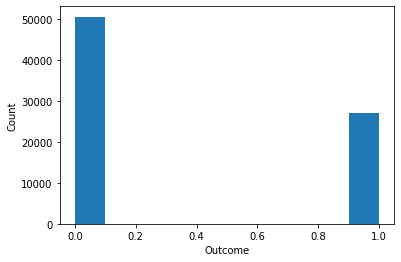

In [623]:
#Un histogramme qui montre le nombre de personnes diabétique et non-diabétique
plt.hist(dataset['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Count')

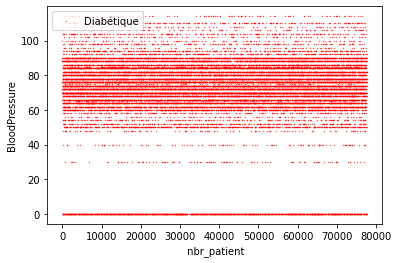

In [624]:
plt.scatter(dataset[dataset.Outcome==1].index,dataset[dataset.Outcome==1].BloodPressure,label="Diabétique",c="r",s=0.1)
#plt.scatter(dataset[dataset.Outcome==0].index,dataset[dataset.Outcome==0].BloodPressure,label="No Diabétique",c="b",s=0.2)
plt.xlabel(" nbr_patient")
plt.ylabel("BloodPressure")
plt.legend()

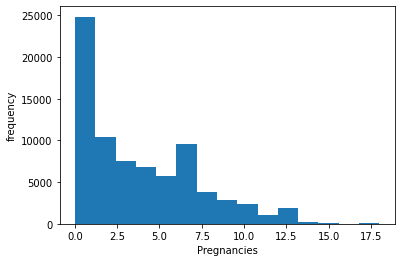

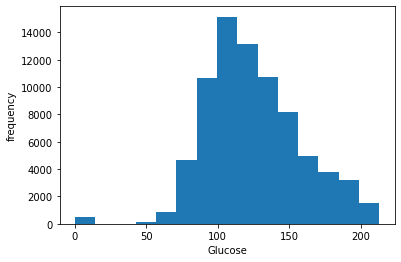

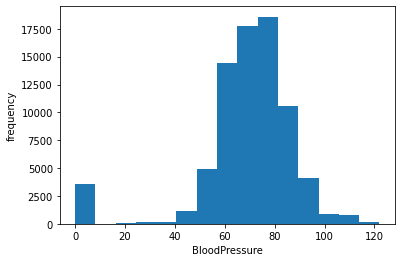

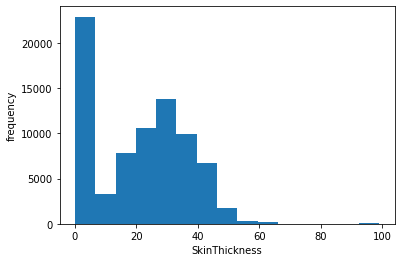

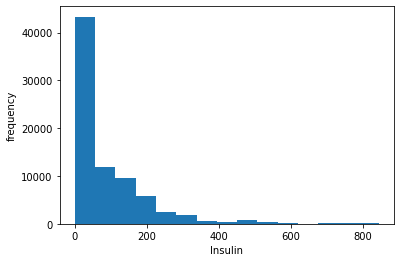

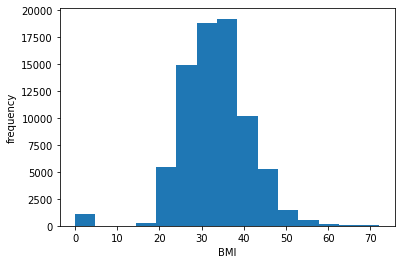

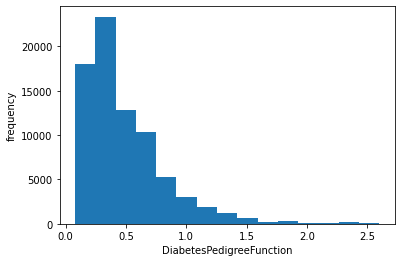

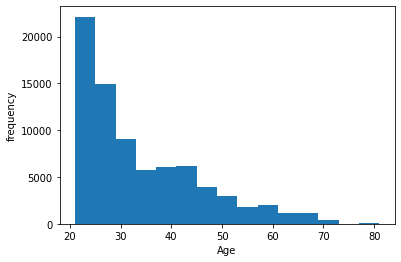

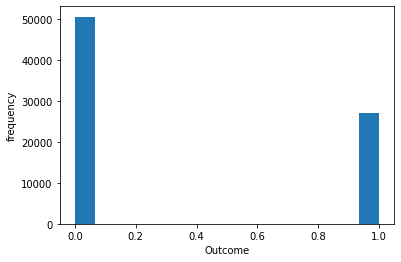

In [625]:
for c in dataset.columns:
    plt.figure()
    plt.hist(dataset[c],bins=15)
    plt.xlabel(c)
    plt.ylabel('frequency')
    plt.show()

In [626]:
#Partie 3: Data Preprocessing

In [627]:
dataset_new = dataset

In [628]:
replace_list_column = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

#data_new = dataset
#dataset_new[replace_list_column] = dataset[replace_list_column].replace(0, np.NaN)

import random
replace_min_insulin0 = 16
replace_min_glucose0 = dataset_new['Glucose'].min()
replace_min_bp0 = dataset_new['BloodPressure'].min()


replace_max_insulin0 = 166
replace_max_glucose0 = 140
replace_max_bp0 = 60


replace_min_insulin1 = 170
replace_min_glucose1 = 170
replace_min_bp1 = dataset_new['BloodPressure'].max()

replace_max_insulin1 = 500
replace_max_glucose1 = dataset_new['Glucose'].max()
replace_max_bp1 = dataset_new['BloodPressure'].max()

replace_skin_min = dataset_new['SkinThickness'].min() 
replace_skin_max = dataset_new['SkinThickness'].max() 

for col in replace_list_column:
    for li in dataset_new.index:
        if(dataset_new["Outcome"][li]==0 and dataset_new[col][li]==0):
            if(col=="Insulin"):
              dataset_new[col][li]=random.uniform(replace_min_insulin0, replace_max_insulin0)
            if(col=="Glucose"):
              dataset_new[col][li]=random.uniform(replace_min_glucose0, replace_max_glucose0)
            if(col=="BloodPressure"):
              dataset_new[col][li]=random.uniform(replace_min_bp0, replace_max_bp0)
            if(col=="SkinThickness"):
              dataset_new[col][li]=random.uniform(replace_skin_min, replace_skin_max)

        elif(dataset_new["Outcome"][li]==1 and dataset_new[col][li]==0):
          if(col=="Insulin"):
              dataset_new[col][li]=random.uniform(replace_min_insulin1, replace_max_insulin1)
          if(col=="Glucose"):
              dataset_new[col][li]=random.uniform(replace_min_glucose1, replace_max_glucose1)
          if(col=="BloodPressure"):
              dataset_new[col][li]=random.uniform(replace_min_bp1, replace_max_bp1)
          if(col=="SkinThickness"):
              dataset_new[col][li]=random.uniform(replace_skin_min, replace_skin_max)
dataset_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to b

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129,70,18,122,29.43,1.17,45,1
1,1,205,76,36,249,37.28,0.92,29,1
2,8,97,82,1,98,37.82,0.59,68,0
3,7,141,90,41,115,34.25,0.40,39,0
4,4,120,72,66,363,29.12,0.39,46,1
...,...,...,...,...,...,...,...,...,...
77563,3,91,58,11,54,26.26,0.27,22,0
77564,2,112,62,32,56,26.40,0.13,21,0
77565,4,128,68,22,77,36.47,0.40,29,0
77566,1,101,68,21,41,28.56,1.11,22,0


In [629]:
print(dataset_new[np.isfinite(dataset_new) == True])

       Pregnancies  Glucose  ...  Age  Outcome
0                4      129  ...   45        1
1                1      205  ...   29        1
2                8       97  ...   68        0
3                7      141  ...   39        0
4                4      120  ...   46        1
...            ...      ...  ...  ...      ...
77563            3       91  ...   22        0
77564            2      112  ...   21        0
77565            4      128  ...   29        0
77566            1      101  ...   22        0
77567            9      169  ...   49        1

[77568 rows x 9 columns]


In [630]:
replace_list_column = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

#data_new = dataset
#dataset_new[replace_list_column] = dataset[replace_list_column].replace(0, np.NaN)

#for i in data.index:
#print(data.loc[data['Insulin'].isin([0,2,4])])
import random
'''

for col in replace_list_column: 
  max_Insulin = dataset[col].max()
  min_Insulin = dataset[col].min()

  dataset_new[col] = dataset_new[col].mask(dataset_new[col].isnull(), np.random.uniform(min_Insulin, max_Insulin, size=dataset_new[col].shape))

#data_new = data_new.dropna(axis=0, how='any')

dataset_new'''

"\n\nfor col in replace_list_column: \n  max_Insulin = dataset[col].max()\n  min_Insulin = dataset[col].min()\n\n  dataset_new[col] = dataset_new[col].mask(dataset_new[col].isnull(), np.random.uniform(min_Insulin, max_Insulin, size=dataset_new[col].shape))\n\n#data_new = data_new.dropna(axis=0, how='any')\n\ndataset_new"

In [631]:
'''column = dataset_new['Age']

Age = []

for i in range(len(column)): 
  if(column[i] <= 20):
    Age.append(1)
  elif (column[i]<=40 and column[i]>20):
    Age.append(2)
  elif (column[i]<=60 and column[i]>40): 
    Age.append(3)
  elif (column[i]<=80 and column[i]>60): 
    Age.append(4)
  else : Age.append(5)

dataset_new["Age_class"] = Age
dataset_new'''
dataset_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129,70,18,122,29.43,1.17,45,1
1,1,205,76,36,249,37.28,0.92,29,1
2,8,97,82,1,98,37.82,0.59,68,0
3,7,141,90,41,115,34.25,0.40,39,0
4,4,120,72,66,363,29.12,0.39,46,1
...,...,...,...,...,...,...,...,...,...
77563,3,91,58,11,54,26.26,0.27,22,0
77564,2,112,62,32,56,26.40,0.13,21,0
77565,4,128,68,22,77,36.47,0.40,29,0
77566,1,101,68,21,41,28.56,1.11,22,0


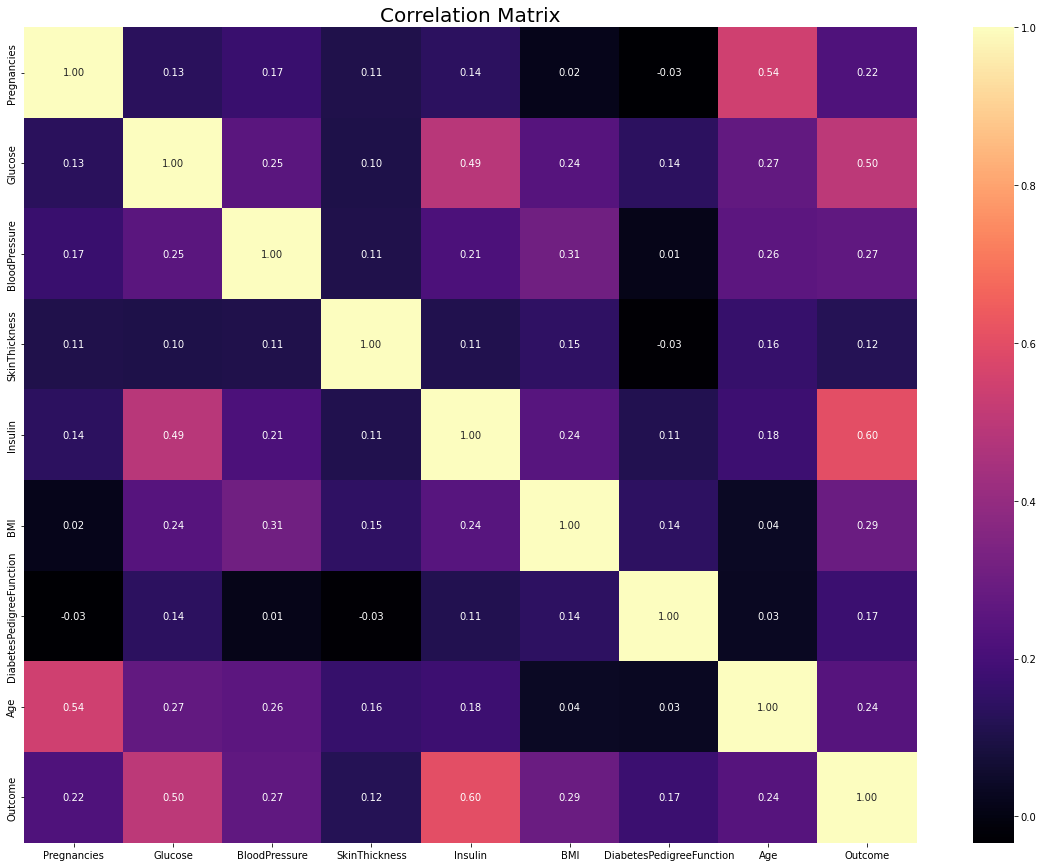

In [632]:
import seaborn as sns
def plot_corr(df,size=11): 
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Yellow means that they are highly correlated.
                                           
    """
    '''corr = df.corr() # calling the correlation function on the datafrmae
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks
    '''
    f, ax = plt.subplots(figsize= [20,15])
    sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
    ax.set_title("Correlation Matrix", fontsize=20)

plot_corr(dataset_new)

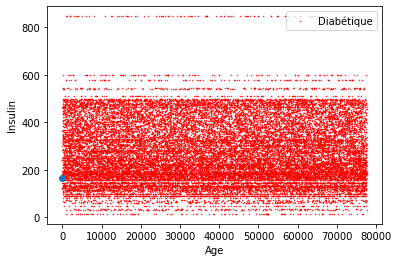

In [656]:
plt.scatter(dataset_new[dataset_new.Outcome==1].index,dataset_new[dataset_new.Outcome==1].Insulin,label="Diabétique",c="r",s=0.2)
#plt.scatter(dataset_new[dataset_new.Outcome==0].Age_class,dataset_new[dataset_new.Outcome==0].Insulin,label="No Diabétique",c="b",s=0.2)
y = 166
plt.scatter(0,y)
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()


In [657]:
dataset_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129,70,18,122,29.43,1.17,45,1
1,1,205,76,36,249,37.28,0.92,29,1
2,8,97,82,1,98,37.82,0.59,68,0
3,7,141,90,41,115,34.25,0.40,39,0
4,4,120,72,66,363,29.12,0.39,46,1
...,...,...,...,...,...,...,...,...,...
77563,3,91,58,11,54,26.26,0.27,22,0
77564,2,112,62,32,56,26.40,0.13,21,0
77565,4,128,68,22,77,36.47,0.40,29,0
77566,1,101,68,21,41,28.56,1.11,22,0


In [678]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_new.iloc[:, [1,2,3,4,5,6,7]].values
Y = dataset_new.iloc[:, 8].values

Y

array([1, 1, 0, ..., 0, 0, 1])

In [679]:
import sklearn

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3)

x_train

array([[165.  ,  78.  ,  26.  , ...,  34.  ,   0.84,  31.  ],
       [150.  ,  68.  ,  29.  , ...,  29.79,   0.37,  42.  ],
       [134.  ,  58.  ,  20.  , ...,  27.45,   0.36,  21.  ],
       ...,
       [141.  , 122.  ,  83.  , ...,  35.18,   0.32,  23.  ],
       [ 68.  ,  72.  ,  23.  , ...,  33.6 ,   0.62,  42.  ],
       [100.  ,  66.  ,  15.  , ...,  23.24,   0.5 ,  22.  ]])

In [680]:
y_test

array([1, 0, 1, ..., 0, 0, 1])

In [681]:
# Checking dimensions
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)


X_train shape: (54297, 7)
X_test shape: (23271, 7)
Y_train shape: (54297,)
Y_test shape: (23271,)


In [682]:
x_train

array([[165.  ,  78.  ,  26.  , ...,  34.  ,   0.84,  31.  ],
       [150.  ,  68.  ,  29.  , ...,  29.79,   0.37,  42.  ],
       [134.  ,  58.  ,  20.  , ...,  27.45,   0.36,  21.  ],
       ...,
       [141.  , 122.  ,  83.  , ...,  35.18,   0.32,  23.  ],
       [ 68.  ,  72.  ,  23.  , ...,  33.6 ,   0.62,  42.  ],
       [100.  ,  66.  ,  15.  , ...,  23.24,   0.5 ,  22.  ]])

In [683]:
from sklearn import model_selection
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[i for i in range(1,50,2)]}
#x = range(1,31)
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=3,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(x_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params'],
         # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params,
    ) )



Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 1}
Résultats de la validation croisée :
accuracy = 0.997 (+/-0.002) for {'n_neighbors': 1}
accuracy = 0.995 (+/-0.001) for {'n_neighbors': 3}
accuracy = 0.993 (+/-0.001) for {'n_neighbors': 5}
accuracy = 0.990 (+/-0.001) for {'n_neighbors': 7}
accuracy = 0.988 (+/-0.001) for {'n_neighbors': 9}
accuracy = 0.985 (+/-0.001) for {'n_neighbors': 11}
accuracy = 0.983 (+/-0.001) for {'n_neighbors': 13}
accuracy = 0.981 (+/-0.001) for {'n_neighbors': 15}
accuracy = 0.979 (+/-0.002) for {'n_neighbors': 17}
accuracy = 0.977 (+/-0.001) for {'n_neighbors': 19}
accuracy = 0.976 (+/-0.001) for {'n_neighbors': 21}
accuracy = 0.974 (+/-0.001) for {'n_neighbors': 23}
accuracy = 0.973 (+/-0.001) for {'n_neighbors': 25}
accuracy = 0.972 (+/-0.001) for {'n_neighbors': 27}
accuracy = 0.971 (+/-0.002) for {'n_neighbors': 29}
accuracy = 0.969 (+/-0.002) for {'n_neighbors': 31}
accuracy = 0.969 (+/-0.002) for {'n_neighbors': 33}
accuracy

In [684]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [685]:
y_pred = knn.predict(x_test)

In [686]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [687]:
y_test

array([1, 0, 1, ..., 0, 0, 1])

In [688]:
metrics.accuracy_score(y_test, y_pred)

0.994886339220489

In [689]:
cpt = 0
for i in range(len(y_pred)):
  if y_pred[i] != y_test[i]:
    cpt +=1

cpt

119

In [690]:
x_test.shape

(23271, 7)

In [691]:
rate = cpt / y_test.shape[0]
rate

0.005113660779510979

In [692]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [693]:
y_test

array([1, 0, 1, ..., 0, 0, 1])

In [694]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
      if y_actual[i]==y_pred[i]==1:
         TP += 1
      if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
         FP += 1
      if y_actual[i]==y_pred[i]==0:
         TN += 1
      if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
         FN += 1

    return(TP, FP, TN, FN)

TP,FP,TN,FN = perf_measure(y_test, y_pred)

precision = TP/(TP+FP)
recall = TP/(TP+FN)

(precision, recall)

(0.9933057448880234, 0.9922188449848024)

In [695]:
y_pred1 = knn.predict(x_train)